# Практика 3

## Задача 1

Выполнить расчет тепловой схемы простой ГТУ при заданных или принятых по оценке следующих величинах:

* Элктрическая мощность 100 МВт
* Температура газов перед турбиной 1200 градусов Цельсия
* Температура воздуха на входе в компрессор 15 градусов Цельсия
* Отношение давлений компрессора 16
* Коэффициент потерь давления $\delta / \epsilon $ = 0.95
* КПЛ камеры сгорания 0.995
* Механический КПД турбины 0.995
* КПД генератора 0.982
* Изотропный КПД турбины 0.88
* Изотропный КПД компрессора 0.86
* Коэффициент утечек 0.005
* Удельная теплота сгорания 1 кг топлива 50 000 кДж/кг
* Минимально необходимое количество воздуха для полного сжигания 1 кг газа $L_0$ = 17.32 кг/кг

* Теплоемкость воздуха Cp = 1010 Дж/(кг K)
* Tеплоемкость продуктов сгорания Cp = 1320 Дж/(кг K)
* Молекулярная масса воздуха 28.86 кг/моль
* Молекулярная масса чистых продуктов сгорания 27.65 кг/моль
* Газовая постоянная воздуха 288.1 Дж/(кг К)
* Газовая чистых продуктов сгорания 300.7 Дж/(кг К)

In [27]:
MW = 1e6
to_kelvin = lambda x: x + 273.15
kJ = 1e3

In [2]:
N = 100 * MW
Ta = to_kelvin(15)
Tc = to_kelvin(1200)
compression_factor = 16
turbine_expansion_ratio = compression_factor * 0.95
combustion_chamber_efficiency = 0.995
mechanical_efficiency = 0.995
electrical_efficiency = 0.982
turbine_efficiency = 0.88
compressor_efficiency = 0.86
leakage_coeff = 0.005
fuel_heat = 50000 * kJ
L = 17.32

cp_air = 1010
cp_ccp = 1320
R_air = 288.1
R_ccp = 300.7
mu_air = 28.86
mu_ccp = 27.65

In [3]:
k_air = cp_air / (cp_air - R_air)
m_air = (k_air - 1) / k_air
m_air

0.2852475247524752

In [4]:
Tb = Ta * (1 + (compression_factor ** m_air - 1) / compressor_efficiency)
H_compressor = cp_air * Ta * (compression_factor ** m_air - 1) / compressor_efficiency

H_compressor, (Tb - Ta) * cp_air

(407891.8794747853, 407891.87947478524)

In [5]:
ha = Ta * cp_air
hb = Tb * cp_air

hc_air = Tc * cp_air
hc_ccp = Tc * cp_ccp

$$\alpha = \frac{K_т \eta_{к.с.} + L_0 h_в + h_{т.п.} - (1 + L_0)h_{п.с.}} {L_0(h_в-h_b)}$$

In [6]:
numenator = (
    fuel_heat * combustion_chamber_efficiency +
    L * hc_air +
    0 -
    (1 + L) * hc_ccp
)

denumenator = L * (hc_air - hb)

air_excess = numenator / denumenator
air_excess

2.919613710540248

<center>Массовые доли продуктов сгорания
$$g_{п.с.} = \frac{1 + L}{1 + \alpha L}$$
$$g_{в} = 1 - g_{п.с.}$$

In [7]:
g_ccp = (1 + L) / (1 + air_excess * L)
g_air = 1 - g_ccp
g_ccp, g_air

(0.3552610769318921, 0.644738923068108)

In [8]:
hc = g_air * hc_air + g_ccp * hc_ccp
hc

1650120.8851994872

<center>Объемная доля воздуха в продуктах сгорания
$$q = \frac{\mu_{п.с.}L}{\mu_в (1 + L)}$$
$$r_в = \frac{q(\alpha - 1)}{1 + q(\alpha - 1)}$$

<br>

<center>Молекулярная масса смеси
$$\mu_г = \mu_в r_в + \mu_{п.с.}(1-r_в)$$

<br>

<center>Газовая постоянная
$$R_г = 8.314/\mu_г$$

In [9]:
_q = (mu_ccp * L) / (mu_air * (1 + L))
r_air = _q * (air_excess - 1) / (1 + _q * (air_excess - 1))
r_air

0.634868816124687

In [10]:
mu_gas = mu_air * r_air + mu_ccp * (1 - r_air)
R_gas = 8314 / mu_gas

mu_gas, R_gas

(28.41819126751087, 292.5590837832452)

In [11]:
cp_gas = hc / Tc

k_gas = cp_gas / (cp_gas - R_gas)
m_gas = (k_gas - 1) / k_gas
m_gas

0.26118293401467074

In [12]:
Td = Tc * (1 - (1 - turbine_expansion_ratio ** (-m_gas)) * turbine_efficiency)
H_turbine = cp_gas * Tc * (1 - turbine_expansion_ratio ** (-m_gas)) * turbine_efficiency

H_compressor, (Tb - Ta) * cp_air

(407891.8794747853, 407891.87947478524)

<center>Расход газа через турбину
  $$G_т = N_e / H_e$$
    <br>
  $$N_e = N_э / \eta_{э.г.}$$
   <br>
  $$H_e = H_т\eta_м - bH_k$$ 
    <br>
  $$b = \frac{\alpha L (1 + \alpha_{у})}{1 + \alpha L}$$ 
  <br>

In [13]:
gas_ratio = air_excess * L * (1 + leakage_coeff) / (1 + air_excess * L)
gas_ratio

0.9855110599172187

In [14]:
H_effecive = H_turbine * mechanical_efficiency - gas_ratio * H_compressor
H_effecive

333050.5795518964

In [15]:
N_effective = N / electrical_efficiency
N_effective

101832993.89002037

In [16]:
gas_mass_flow_rate = N_effective / H_effecive
gas_mass_flow_rate

305.75834465453204

<center>Расход воздуха подаваемого компрессором
$$G_к^* = G_к (1 + \alpha_{у}) = b G_т$$
<br>
<center>Расход топлива
$$B = G_т / (1 + \alpha L)$$
<br>
<center>Мощность развиваемая газовой турбиной
$$N_т = G_т H_т$$
<br>
<center>Мощность потребляемая компрессором
$$N_к = G_к^* H_к$$
<br>
<center>Коэффициент полезной работы
$$\phi = N_e / N_т$$
<br>
<center>Коэффициент полезного действия ГТУ
$$\eta_э = G_т H_e \eta_{э.г.} / (B K_т)$$


In [17]:
air_mass_flow_rate = gas_ratio * gas_mass_flow_rate
air_mass_flow_rate

301.3282303190221

In [18]:
fuel_mass_flow_rate = gas_mass_flow_rate / (1 + air_excess * L)
fuel_mass_flow_rate

5.9292597599826244

In [19]:
turbine_power = gas_mass_flow_rate * H_turbine
compressor_power = air_mass_flow_rate * H_compressor
turbine_power / MW, compressor_power/ MW

(225.87169054638923, 122.90933820363692)

In [20]:
useful_work_coefficient = N_effective / turbine_power
useful_work_coefficient

0.45084443138351615

In [21]:
efficiency = gas_mass_flow_rate * H_effecive * electrical_efficiency / (fuel_mass_flow_rate * fuel_heat)
efficiency

0.3373102344913729

## Задача  2

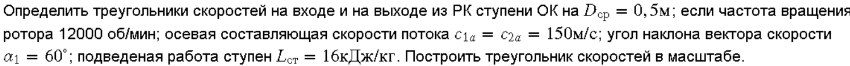

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from scipy.optimize import minimize

In [26]:
def plot_triangle(
    ax,
    u = None,
    c_a = None,
    c_u = None,
    w_a = None,
    w_u = None,
    **kwargs,
):
    if c_u and c_a:
        ax.plot([0, -c_u], [0, -c_a], label='C_1', color='red', **kwargs)
    if w_u and w_a:
        ax.plot([0, -w_u], [0, -w_a], label='W_1', color='green', **kwargs)
    if (c_u and c_a) or (w_u and w_a):
        if c_u and c_a:
            ax.plot([-c_u, -c_u + u], [-c_a, -c_a], label='u', color='blue', **kwargs)
        else:
            ax.plot([-w_u, -w_u - u], [-w_a, -w_a], label='u', color='blue', **kwargs)
    ax.legend()

In [29]:
average_diameter = 0.5
n = 12000 / 60 # об/c
c_1_a = 150
alpha_1 = 60

stage_work = 16 * kJ

In [30]:
u = np.pi * average_diameter * n
u

314.1592653589793

In [31]:
c_1 = c_1_a / np.sin(np.deg2rad(alpha_1))
c_1

173.20508075688775

In [32]:
c_1_u = c_1 * np.cos(np.deg2rad(alpha_1))
c_1_u

86.60254037844389

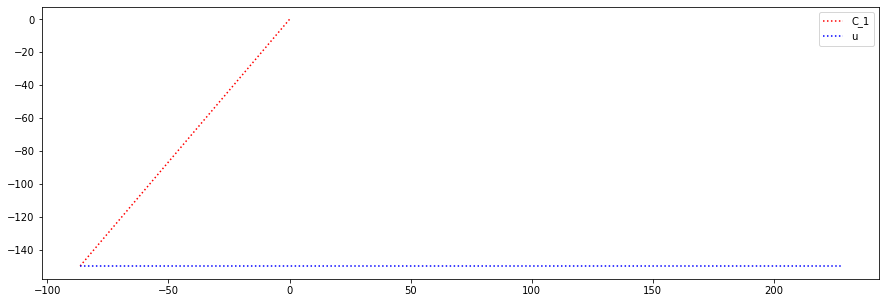

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, linestyle="dotted")


In [34]:
w_1_u = c_1_u - u
w_1_u

-227.55672498053542

In [35]:
w_1_a = c_1_a
w_1_a

150

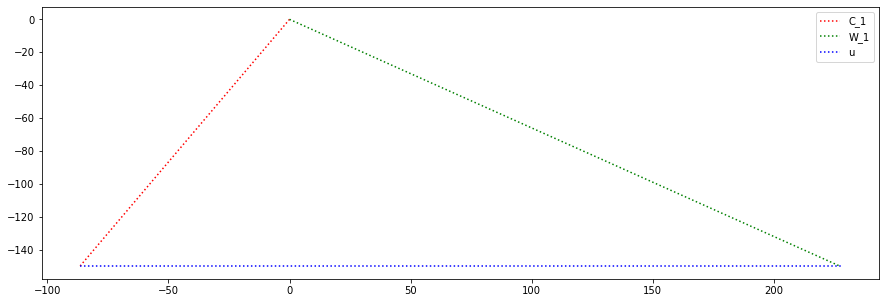

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")

In [37]:
w_1 = (w_1_a ** 2 + w_1_u ** 2) ** 0.5
w_1

272.5473593412107

In [38]:
beta_1 = np.rad2deg(np.arccos(w_1_u / w_1))
beta_1

146.608075701148

In [39]:
delta_w_u = stage_work / u
delta_w_u

50.929581789406505

In [40]:
w_2_u = w_1_u + delta_w_u
w_2_u

-176.6271431911289

In [41]:
w_2_a = c_1_a
w_2_a

150

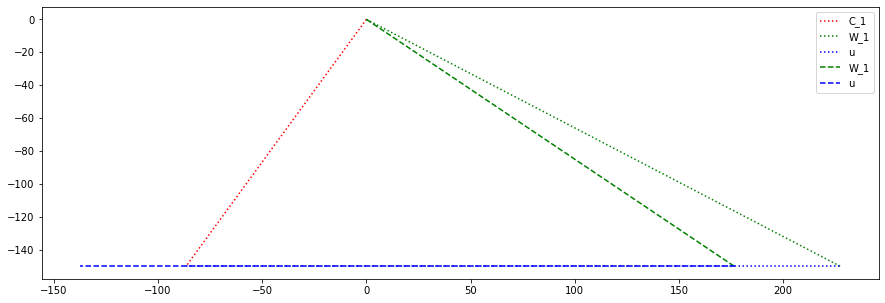

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")
plot_triangle(ax=ax, u=u, w_a=w_2_a, w_u=w_2_u, linestyle="dashed")

In [43]:
w_2 = (w_2_a ** 2 + w_2_u**2) ** 0.5
w_2

231.7264501774874

In [44]:
beta_2 = np.rad2deg(np.arccos(w_2_u / w_2))
beta_2

139.66053335959572

In [45]:
delta_c_u = delta_w_u
c_2_u = c_1_u + delta_c_u
c_2_u

137.5321221678504

In [46]:
c_2_a = c_1_a
c_2_a

150

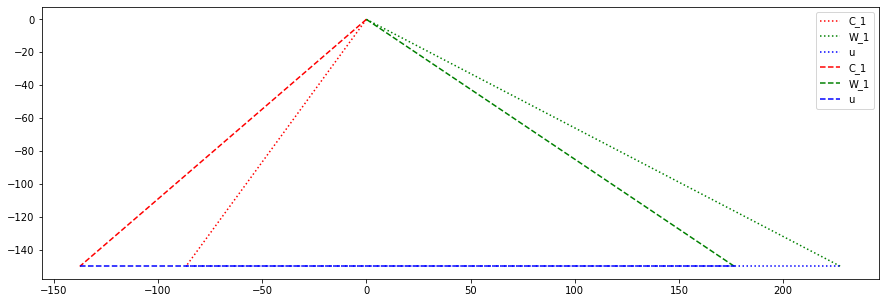

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")
plot_triangle(ax=ax, u=u, w_a=w_2_a, w_u=w_2_u, c_a=c_2_a, c_u=c_2_u, linestyle="dashed")


In [48]:
c_2 = (c_2_u ** 2 + c_2_a ** 2) ** 0.5
c_2

203.5069645687649

In [49]:
alpha_2 = np.rad2deg(np.arcsin(c_2_a / c_2))
alpha_2

47.48288628953232

In [50]:
table = pd.DataFrame({
    "absolute_speed": [c_1, c_2],
    "absolute_angle": [alpha_1, alpha_2],
    "relative_speed": [w_1, w_2],
    "relative_angle": [beta_1, beta_2],
    "triangle": ["inlet", "outlet"],
}).set_index("triangle")

In [51]:
table

,absolute_speed,absolute_angle,relative_speed,relative_angle
triangle,,,,
inlet,173.205081,60.000000,272.547359,146.608076
outlet,203.506965,47.482886,231.726450,139.660533
